In [1]:
import numpy as np
import pandas as pd

# Задача 1. "Шахматная матрица 8х8"

Создать матрицу размером 8х8 элементов,состоящую из нулей.Заполнить эту матрицу значениями, расположенными в шахматном порядке. Задачу решить через срезы массива NumPy. Вывести полученную матрицу на экран и в файл.

In [2]:
axis0 = 8
axis1 = 8
chess_array = np.zeros((axis0, axis1), dtype=int)
chess_array[0::2,1::2] = 1
chess_array[1::2,0::2] = 1
np.save("chess_array", chess_array)
np.savetxt("chess_array.csv", chess_array, delimiter=",", fmt="%d")
print(chess_array)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


# Зачача 2. Математика с NumPy

Средствами NumPy сформируйте вектор из 2000 случайных величин, распределенных по нормальному закону с математическим ожиданием 0 и дисперсией 5. Средствами NumPy вычислите для полученного вектора экспериментальное значение математического ожидания (среднее значение) и дисперсию.

In [3]:
rnd_vector = np.random.normal(loc=0, scale=5**0.5, size=2000)
print(f'Среднее = {rnd_vector.mean()}')
print(f'Дисперсия = {rnd_vector.var()}')

Среднее = 0.008996508698602431
Дисперсия = 5.001224563922633


# Задача 3. Работа с библиотекой Pandas

1. Загрузить один из файлов csv в DataFrame по ссылке:https://www.geos.ed.ac.uk/~weather/jcmb_ws/
2. Посмотреть на наименования столбцов. При необходимости, сократить или сделать более понятными.
3. Сохранить первые 1000 строк DataFrame в CSV-файл.
4. Загрузите в DataFrame сохраненный на предыдущем шаге CSV-файл и отобразите на экране первые 20 записей, последние 20 записей, любой срез по записям.
5. Найдите количество уникальных значений столбца «relativehumidity(%)» (или % для данных старше 2017 года) и отобразите их на экране.
6. Найдите 10 наибольших значений «windspeed(m/s)» (или m/s для данных старше 2017 года) и постройте по ним график с помощью встроенных возможностей pandas DataFrame.

In [4]:
#df = pd.read_csv("JCMB_2018_Mar.csv", skiprows=[0,2,3])
df = pd.read_csv("JCMB_2015_May.csv", index_col="date-time")

In [5]:
df.head()

,atmospheric pressure (mBar),rainfall (mm),wind speed (m/s),wind direction (degrees),surface temperature (C),relative humidity (%),solar flux (Kw/m2),battery (V)
date-time,,,,,,,,
2015/05/01 00:01,1014,0.0,0.0,0.0,4.565,79.5,0.0,13.89
2015/05/01 00:02,1014,0.0,0.0,0.0,4.543,79.4,0.0,13.89
2015/05/01 00:03,1014,0.0,0.0,0.0,4.494,79.3,0.0,13.89
2015/05/01 00:04,1014,0.0,0.0,0.0,4.472,79.3,0.0,13.89
2015/05/01 00:05,1014,0.0,0.0,0.0,4.453,79.4,0.0,13.89


In [6]:
# Переименовать столбцы
df.rename(columns={'date-time': 'datetime', 'atmospheric pressure (mBar)': 'atm_pressure',
                   'rainfall (mm)': 'rainfall', 'wind speed (m/s)': 'wind_speed', 
                   'wind direction (degrees)': 'wind_direct', 'surface temperature (C)': 'tempreature', 
                   'relative humidity (%)': 'rel_humidity', 'solar flux (Kw/m2)': 'solar_flux',
                   'battery (V)': 'battery'}, inplace=True)

In [7]:
df.head()

,atm_pressure,rainfall,wind_speed,wind_direct,tempreature,rel_humidity,solar_flux,battery
date-time,,,,,,,,
2015/05/01 00:01,1014,0.0,0.0,0.0,4.565,79.5,0.0,13.89
2015/05/01 00:02,1014,0.0,0.0,0.0,4.543,79.4,0.0,13.89
2015/05/01 00:03,1014,0.0,0.0,0.0,4.494,79.3,0.0,13.89
2015/05/01 00:04,1014,0.0,0.0,0.0,4.472,79.3,0.0,13.89
2015/05/01 00:05,1014,0.0,0.0,0.0,4.453,79.4,0.0,13.89


In [8]:
# Сохранить первую 1000 строк в csv
df[:1000].to_csv("JCMB_2015_May_First_1000.csv")

In [9]:
# Загрузите в DataFrame сохраненный на предыдущем шаге CSV-файл 
df_1000 = pd.read_csv("JCMB_2015_May_First_1000.csv")

In [10]:
# отобразите на экране первые 20 записей
df_1000.head(20)

,date-time,atm_pressure,rainfall,wind_speed,wind_direct,tempreature,rel_humidity,solar_flux,battery
0,2015/05/01 00:01,1014,0.0,0.0,0.0,4.565,79.5,0.0,13.89
1,2015/05/01 00:02,1014,0.0,0.0,0.0,4.543,79.4,0.0,13.89
2,2015/05/01 00:03,1014,0.0,0.0,0.0,4.494,79.3,0.0,13.89
3,2015/05/01 00:04,1014,0.0,0.0,0.0,4.472,79.3,0.0,13.89
4,2015/05/01 00:05,1014,0.0,0.0,0.0,4.453,79.4,0.0,13.89
5,2015/05/01 00:06,1014,0.0,0.0,0.0,4.436,79.4,0.0,13.89
6,2015/05/01 00:07,1014,0.0,0.0,0.0,4.425,79.4,0.0,13.89
7,2015/05/01 00:08,1014,0.0,0.0,0.0,4.376,79.3,0.0,13.89
8,2015/05/01 00:09,1014,0.0,0.0,0.0,4.327,79.3,0.0,13.89
9,2015/05/01 00:10,1014,0.0,0.0,0.0,4.288,79.4,0.0,13.89


In [11]:
# отобразите на экране последние 20 записей
df_1000.tail(20)

,date-time,atm_pressure,rainfall,wind_speed,wind_direct,tempreature,rel_humidity,solar_flux,battery
980,2015/05/01 16:21,1013,0.0,1.750,42.21,7.53,61.70,0.483895,13.55
981,2015/05/01 16:22,1013,0.0,1.792,76.60,7.68,61.50,0.498693,13.54
982,2015/05/01 16:23,1013,0.0,2.229,30.73,7.79,60.91,0.516450,13.55
983,2015/05/01 16:24,1013,0.0,3.167,56.83,7.60,61.40,0.512011,13.55
984,2015/05/01 16:25,1013,0.0,2.521,45.30,7.45,62.03,0.506092,13.55
985,2015/05/01 16:26,1013,0.0,2.500,67.09,7.58,61.11,0.494253,13.55
986,2015/05/01 16:27,1013,0.0,2.458,53.44,7.43,61.64,0.504612,13.55
987,2015/05/01 16:28,1013,0.0,1.771,67.05,7.50,61.90,0.512011,13.55
988,2015/05/01 16:29,1013,0.0,2.688,59.57,7.58,61.44,0.537167,13.55
989,2015/05/01 16:30,1013,0.0,3.063,79.10,7.39,61.97,0.543087,13.55


In [12]:
# отобразите на экране любой срез по записям.
df_1000.sample(20)

,date-time,atm_pressure,rainfall,wind_speed,wind_direct,tempreature,rel_humidity,solar_flux,battery
811,2015/05/01 13:32,1013,0.0,2.896,61.24,7.590,53.15,0.843486,13.57
524,2015/05/01 08:45,1013,0.0,0.000,0.00,3.294,64.64,0.235288,13.93
181,2015/05/01 03:02,1013,0.0,0.000,0.00,3.162,65.63,0.000000,13.97
341,2015/05/01 05:42,1013,0.0,0.063,280.90,1.254,70.70,0.007399,14.02
995,2015/05/01 16:36,1013,0.0,3.604,42.71,7.310,62.69,0.531248,13.55
141,2015/05/01 02:22,1013,0.0,0.000,0.00,2.927,67.65,0.000000,13.95
389,2015/05/01 06:30,1013,0.0,0.000,0.00,1.232,71.70,0.035515,14.02
817,2015/05/01 13:38,1013,0.0,3.479,42.96,7.440,56.66,0.833127,13.57
771,2015/05/01 12:52,1013,0.0,2.542,52.44,7.050,58.56,0.880481,13.62
490,2015/05/01 08:11,1013,0.0,1.271,310.30,2.706,66.28,0.267844,13.96


In [13]:
# Найдите количество уникальных значений столбца «relativehumidity(%)» (или % для данных старше 2017 года) и отобразите их на экране.

In [14]:
print(f'Уникальных значений "relative humidity": {len(df["rel_humidity"].unique())}')
print(df["rel_humidity"].unique())

Уникальных значений "relative humidity": 3005
[79.5  79.4  79.3  ... 67.6  67.14 46.78]


In [15]:
# Найдите 10 наибольших значений «windspeed(m/s)» (или m/s для данных старше 2017 года) и постройте по ним график с помощью встроенных возможностей pandas 
wind_speed_top10 = df["wind_speed"].sort_values(ascending=False).head(10)
print(wind_speed_top10)

date-time
2015/05/10 13:54    13.71
2015/05/12 13:59    13.42
2015/05/11 11:51    13.25
2015/05/10 17:22    12.98
2015/05/10 14:13    12.85
2015/05/10 17:25    12.65
2015/05/16 16:37    12.52
2015/05/10 14:17    12.48
2015/05/16 16:38    12.38
2015/05/12 13:16    12.25
Name: wind_speed, dtype: float64


<Axes: xlabel='date-time'>

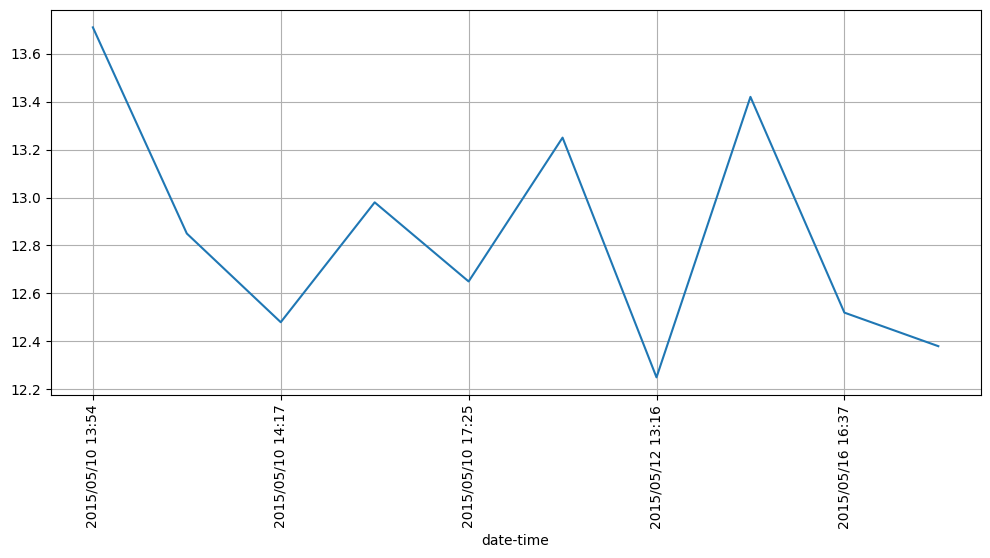

In [16]:
wind_speed_top10.sort_index().plot(figsize=(12, 5), rot=90, grid=True) #, xticks=list(wind_speed_top10.index.values))
